#**Analisis de Datos precio de venta inmuebles en bogota**

El mapa muestra el conjunto de las Unidades de Planificación Zonal, distribuidas en las 19 localidades urbanas de Bogotá

La base de datos está dada por el archivo CSV inmuebles_bogota.csv que resume los inmuebles en venta de la ciudad de Bogotá.

Son áreas urbanas más pequeñas que las localidades y más grandes que el barrio. La función de las UPZ es servir de unidades territoriales o sectores para planificar el desarrollo urbano en el nivel zonal. Son un instrumento de planificación para poder desarrollar una norma urbanística en el nivel de detalle que requiere Bogotá, debido a las grandes diferencias que existen entre unos sectores y otros. Son la escala intermedia de planificación entre los barrios y las localidades. La planificación a esta escala, además de ser la base para la definición de la norma específica, que se concreta en la fichas normativas y decretos de cada UPZ, permite hacer una mejor inversión de los recursos, en obras realmente requeridas por la comunidad, buscando el beneficio colectivo. Vistas así, las UPZ son también el espacio propicio para la participación, la convivencia, el trabajo y el encuentro ciudadano.

"La Unidad de Planeamiento Zonal -UPZ-, tiene como propósito definir y precisar el planeamiento del suelo urbano, respondiendo a la dinámica productiva de la ciudad y a su inserción en el contexto regional, involucrando a los actores sociales en la definición de aspectos de ordenamiento y control normativo a escala zonal" (Artículo 49 del Decreto 190 de 2004 POT).

Son 117 zonas con características similares en las que el Plan de Ordenamiento Territorial dividió la ciudad para asignar las normas urbanísticas.

Cada UPZ está compuesta por varios barrios.

Cada localidad tiene dos o más UPZs.

En la actualidad hay 99 UPZs reglamentadas.

Las Normas comunes para todas las UPZ se encuentran reglamentadas en los Decretos 159 de 2204 y 333 de 2010
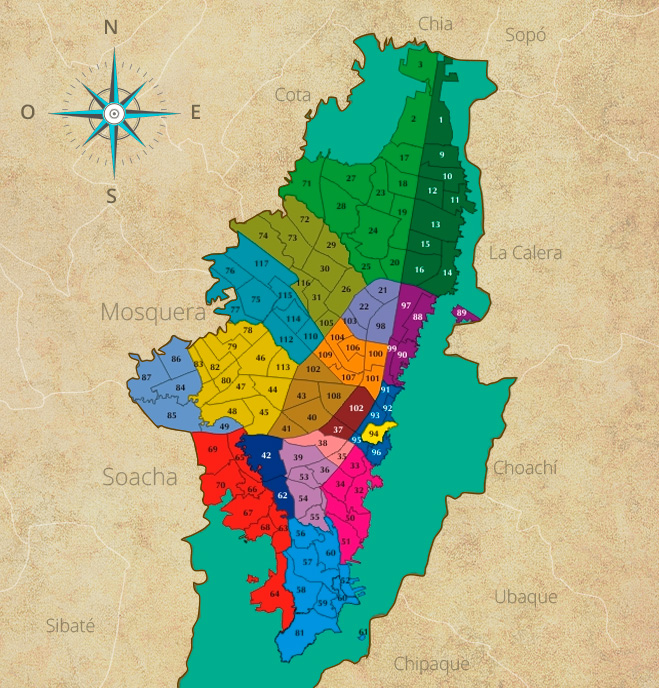

In [1]:
#conectamos nuestro google drive al notebook

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Cargamos la librea de pandas y cargamos nuesto dataset el cual esta en la unidad del drive

import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


Como se puede observar, el dataframe contiene  varios atributos de los inmuebles en venta, como el tipo, la cantidad de habitaciones, la ubicación, etcétera. Como se puede observar, los datos están en español, lo que podría dar problemas al usar python cuando tengamos que tratar con vocales con acentos y la letra ñ. Por eso es necesario renombrar esas columnas problemáticas

In [5]:
#En Pandas, una "shape" generalmente se refiere a la estructura o dimensiones de un DataFrame o una Serie.
inmuebles.shape


(9520, 8)

Esto significa que el DataFrame tiene 9520 filas y 2 columnas

In [6]:
#Este atributo devuelve una lista de las etiquetas (nombres) de las columnas en el DataFrame.

inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [7]:
#El método .rename() te permite especificar un diccionario de mapeo
#que indica cómo se deben cambiar los nombres de las columnas.
#Vamos a cambiar Baños por Banos y Área por Area
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4743,Apartamento,Apartamento en venta en Suba,3,2,79,Suba,Suba,$ 345.000.000
225,Casa,Casa en venta en El Contador,4,3,210,El Contador,Los Cedros,$ 900.000.000
6370,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,73,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 475.000.000
8561,Apartamento,Apartamento en venta en Teusaquillo,6,4,210,Teusaquillo,Teusaquillo,$ 790.000.000
6638,Casa,Casa en venta en Zona Noroccidental,5,4,245,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
8594,Apartamento,Apartamento en venta en Engativa,3,2,46,Engativa,Engativá,$ 182.000.000
80,Apartamento,Apartamento en venta en Fontibón,3,2,84,Fontibón,Fontibón,$ 420.000.000
4523,Casa,Casa en venta en Gran Granada,4,2,77,Gran Granada,Garcés Navas,$ 250.000.000
8209,Casa,Casa en venta en Suba,12,7,288,Suba,Suba,$ 750.000.000
8710,Apartamento,Apartamento en venta en Santa Barbara,1,2,69,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 425.000.000


In [8]:
# mostrará información sobre las columnas del DataFrame, incluyendo el nombre de la columna,
#el número de valores no nulos, el tipo de datos y la cantidad de memoria utilizada:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Podemos analizar con el metodo info que el dataset no tiene valores nulos, tenemos 3 valores enteros y 5 tipo objeto que puede ser string


In [9]:
#es un método en Pandas que se utiliza para la indexación basada en ubicación (posición)
#en un DataFrame o Serie. Puedes usar iloc para seleccionar filas y columnas específicas utilizando índices enteros en lugar de etiquetas.
inmuebles.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

Vamos proceder a mostrar los datos desde el registro 300 al 305 aleatoriamente para validar los datos


In [13]:
inmuebles.iloc[300:305]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
300,Apartamento,Apartamento en venta en Kennedy,2,1,42,Kennedy,Kennedy Central,$ 116.100.000
301,Apartamento,Apartamento en venta en Chico Norte,2,2,95,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000
302,Apartamento,Apartamento en venta en Kennedy,3,2,54,Kennedy,Kennedy Central,$ 237.000.000
303,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 320.000.000
304,Apartamento,Apartamento en venta en Cedritos,4,4,132,Cedritos,Usaquén,$ 530.000.000


con iloc podemos filtrar por una columna del dataframe especificando el registro que queremos ver, para este caso y explicar el iloc vmaos a filtrar por el valor de la casa en indice 300



In [15]:
inmuebles['Valor'][300]

'$ 116.100.000'

In [17]:
#con el metodo type vamos a ver que tipo es nuestro dataset
type(inmuebles['Valor'][300:305])

pandas.core.series.Series

In [20]:
#El método mean() en Pandas se utiliza para calcular la media (promedio) de los valores en un DataFrame o una Serie
inmuebles.Area.mean()
inmuebles.mean()


<ipython-input-20-da338e90f153>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inmuebles.mean()


Habitaciones      3.072479
Banos             2.447899
Area            146.664706
dtype: float64

Podemos identiicar que e promedio de las areas del dataframe estado esta por dada por 146.6 metros cuadrados, el promedio de las habitaciones es de 3 y el de los baños por inmueble es de 2.4



In [30]:
inmuebles.sample(100)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1629,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,103,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 498.900.000
1561,Apartamento,Apartamento en venta en Usaquén,5,5,337,Usaquén,Usaquén,$ 3.300.000.000
131,Apartamento,Apartamento en venta en Rafael Uribe Uribe,3,1,50,Rafael Uribe Uribe,Los Alcázares,$ 143.000.000
650,Apartamento,Apartamento en venta en Zona Noroccidental,3,1,52,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 168.000.000
5720,Apartamento,Apartamento en venta en Engativa,3,2,59,Engativa,Engativá,$ 245.000.000
...,...,...,...,...,...,...,...,...
5610,Casa,Casa en venta en Barrios Unidos,8,5,142,Barrios Unidos,Los Andes,$ 450.000.000
8947,Apartamento,Apartamento en venta en Nueva Zelandia,2,1,40,Nueva Zelandia,SUBA: La Academia + Guaymaral + San José de Ba...,$ 223.000.000
7484,Apartamento,Apartamento en venta en Villa Alsacia,2,1,42,Villa Alsacia,KENNEDY: Castilla + Bavaria,$ 170.000.000
6884,Apartamento,Apartamento en venta en Santa Barbara,2,2,82,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 422.000.000


In [33]:
#comparamos para saber cuantos barrios son iguales al valor que queremos buscar en este caso vamos a
#filtrar por Chico Reservado
(inmuebles.Barrio == 'Chico Reservado')

0       False
1       False
2       False
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool

In [36]:
sum((inmuebles.Barrio == 'Chico Reservado'))

225

In [38]:
# Vamos a crear un nuevo data set para ver los datos del barrio chico reservado
inmuebles_chico = (inmuebles.Barrio == 'Chico Reservado')
type(inmuebles_chico)
chico_reservado = inmuebles[inmuebles_chico]
chico_reservado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000
...,...,...,...,...,...,...,...,...
9299,Apartamento,Apartamento en venta en Chico Reservado,3,3,148,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
9335,Apartamento,Apartamento en venta en Chico Reservado,3,3,176,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9341,Apartamento,Apartamento en venta en Chico Reservado,2,3,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 700.000.000
9472,Apartamento,Apartamento en venta en Chico Reservado,3,1,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 200.000.000


Vamos a identificar por chico resercado su media


In [39]:
chico_reservado.mean()

<ipython-input-39-921c71bdfe82>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  chico_reservado.mean()


Habitaciones      2.506667
Banos             2.844444
Area            142.786667
dtype: float64

In [40]:
#este el total de barrios en el dataset
len(inmuebles.Barrio.value_counts())

149

In [41]:
inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [42]:
#Indentifcar cuantas UPZ estan en dataset
len(inmuebles.UPZ.value_counts())

63

<Axes: >

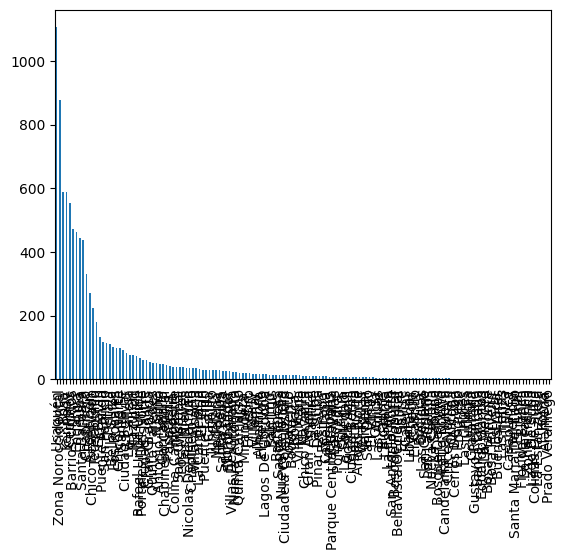

In [49]:
inmuebles_barrio = inmuebles.Barrio.value_counts()
inmuebles_barrio.plot.bar()

<Axes: >

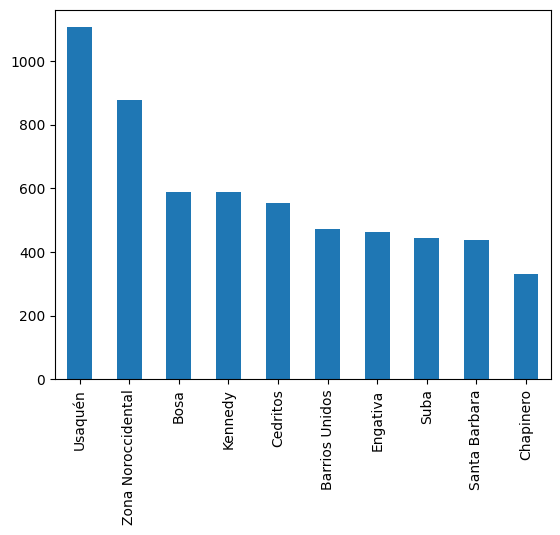

In [65]:
inmuebles_barrio.head(10).plot.bar()

Desafíos:

1. Promedio de área de todos los barrios, y realizar un gráfico con el top 10

2. Consultar otros datos estadísticos: conteo, mediana, valores mínimos y máximos.











#**Desafío 1**

In [90]:
# vamos a genear el metodo estadisco por  2 columnas barrio y area para poder tener las
# metircas de este valor y comocer su promedio en areas
area_mean = inmuebles[['Barrio','Area']].groupby('Barrio').describe()
area_mean.columns = [dato for _,dato in area_mean.columns]

area_mean

,count,mean,std,min,25%,50%,75%,max
Barrio,,,,,,,,
Alameda,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0
Alhambra,17.0,190.411765,99.782300,50.0,112.00,164.0,300.00,360.0
Andes Norte,7.0,124.857143,49.780949,42.0,105.00,108.0,167.00,180.0
Antonio Nariño,48.0,163.062500,151.023798,32.0,58.75,72.0,281.25,554.0
Barrancas,15.0,70.200000,7.022413,63.0,63.00,75.0,76.50,78.0
...,...,...,...,...,...,...,...,...
Villa Maria,13.0,207.153846,47.310757,51.0,222.00,222.0,222.00,222.0
Villas De Granada,22.0,86.590909,51.346312,50.0,64.00,64.0,80.50,260.0
Villemar,18.0,76.888889,48.502139,45.0,54.25,59.0,59.00,224.0


<Axes: title={'center': 'Top 10 Promedio de Áreas'}, xlabel='Barrio', ylabel='Área (m^2)'>

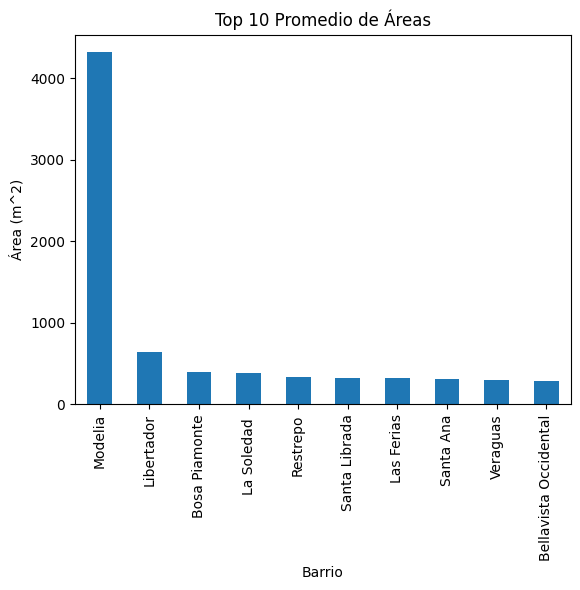

In [92]:
area_promedio = area_mean['mean'].sort_values(ascending = False)

area_promedio.head(10).plot(kind = 'bar', title = 'Top 10 Promedio de Áreas', ylabel = 'Área (m^2)')


El analisis que podemos hacer de este proceso es el tipo de propiedad ya que se un barrio en especifico tiene demasiados metros cuadrados vamos a identificar los *tipos*

In [66]:
inmuebles[inmuebles.Barrio == 'Modelia'].Tipo.value_counts()

Casa           21
Apartamento    19
Name: Tipo, dtype: int64

In [72]:
area_mean.loc['Modelia']


count        40.000000
mean       4316.750000
std       26259.427757
min          48.000000
25%          87.750000
50%         155.500000
75%         224.000000
max      166243.000000
Name: Modelia, dtype: float64

#**Desafío 2**

In [93]:
#Creamos un dataframe con los datos del descripe para poder graficar los valores

columnas = {
    'count' : 'contador',
    'mean' : 'promedio',
    'std' : 'd_estandar',
    '25%' : 'qt1',
    '50%' : 'mediana',
    '75%' : 'qt3'
}

area_mean = area_mean.rename(columns = columnas)

area_mean

,contador,promedio,d_estandar,min,qt1,mediana,qt3,max
Barrio,,,,,,,,
Alameda,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0
Alhambra,17.0,190.411765,99.782300,50.0,112.00,164.0,300.00,360.0
Andes Norte,7.0,124.857143,49.780949,42.0,105.00,108.0,167.00,180.0
Antonio Nariño,48.0,163.062500,151.023798,32.0,58.75,72.0,281.25,554.0
Barrancas,15.0,70.200000,7.022413,63.0,63.00,75.0,76.50,78.0
...,...,...,...,...,...,...,...,...
Villa Maria,13.0,207.153846,47.310757,51.0,222.00,222.0,222.00,222.0
Villas De Granada,22.0,86.590909,51.346312,50.0,64.00,64.0,80.50,260.0
Villemar,18.0,76.888889,48.502139,45.0,54.25,59.0,59.00,224.0


<Axes: title={'center': 'Top 10 desviación estándar del total de áreas'}, xlabel='Barrio', ylabel='Área (m^2)'>

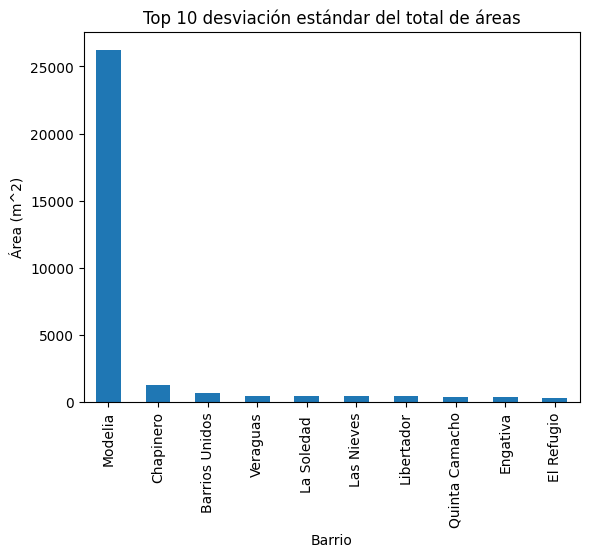

In [95]:
#Desviación estándar
area_d = area_mean['d_estandar'].sort_values(ascending = False)
area_d.head(10).plot(kind = 'bar', title = 'Top 10 desviación estándar del total de áreas', ylabel = 'Área (m^2)')


<Axes: title={'center': 'Top 10 barrios con más inmuebles en venta'}, xlabel='Barrio', ylabel='count'>

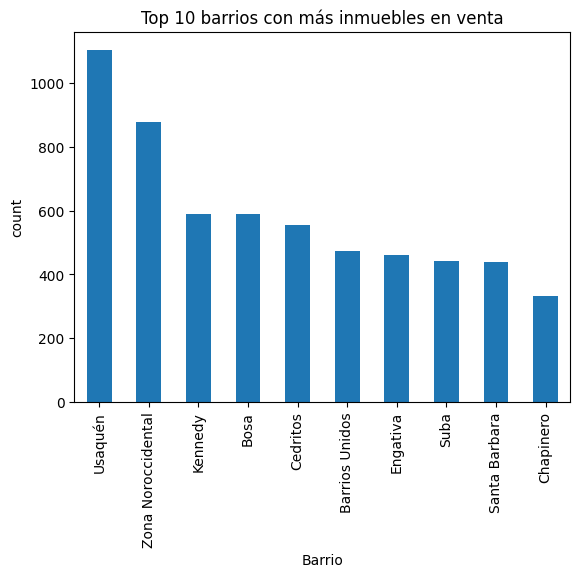

In [96]:
#Contador (Histograma)
area_contador = area_mean['contador'].sort_values(ascending = False)

area_contador.head(10).plot(kind = 'bar', title = 'Top 10 barrios con más inmuebles en venta', ylabel = 'count')

<Axes: title={'center': 'Top 10 valores mínimos por barrio'}, xlabel='Barrio', ylabel='Área (m^2)'>

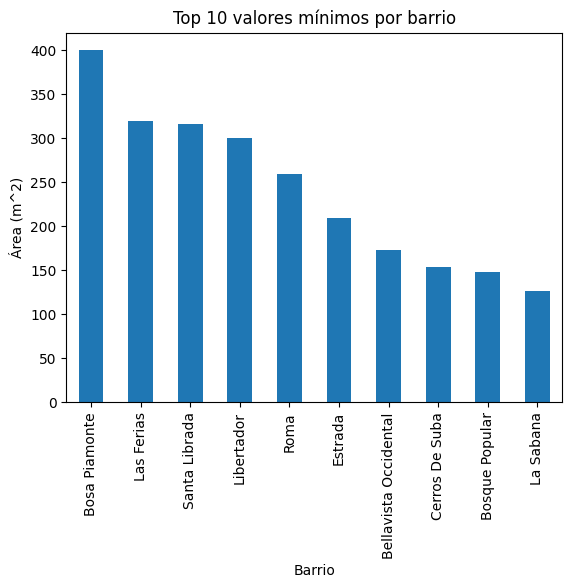

In [79]:
#Valor Mínimo
area_min = area_mean['min'].sort_values(ascending = False)

area_min.head(10).plot(kind = 'bar', title = 'Top 10 valores mínimos por barrio', ylabel = 'Área (m^2)')

<Axes: title={'center': 'Top 10 valores máximos por barrio'}, xlabel='Barrio', ylabel='Área (m^2)'>

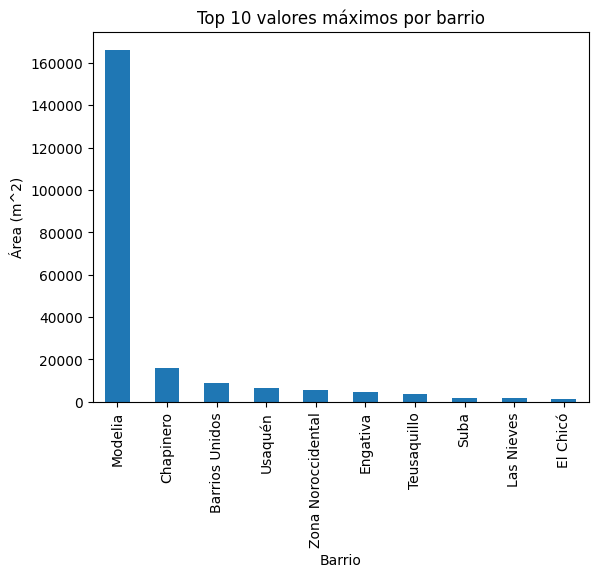

In [81]:
#Valor Máximo
area_max = area_mean['max'].sort_values(ascending = False)

area_max.head(10).plot(kind = 'bar', title = 'Top 10 valores máximos por barrio', ylabel = 'Área (m^2)')

<Axes: title={'center': 'Top 10 mediana de áreas por barrio'}, xlabel='Barrio', ylabel='Área (m^2)'>

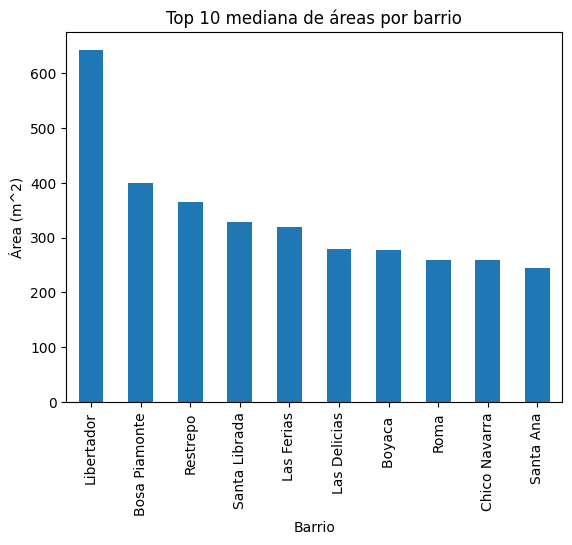

In [82]:
#Mediana
area_mediana = area_mean['mediana'].sort_values(ascending = False)

area_mediana.head(10).plot(kind = 'bar', title = 'Top 10 mediana de áreas por barrio', ylabel = 'Área (m^2)')

#**Aula 2**

In [97]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3700,Casa,Casa en venta en Usaquén,3,3,75,Usaquén,Usaquén,$ 330.000.000
4027,Casa,Casa en venta en Barrios Unidos,5,4,231,Barrios Unidos,Los Andes,$ 1.000.000.000
7363,Apartamento,Apartamento en venta en Bosa,3,1,42,Bosa,Bosa Central,$ 125.000.000
843,Apartamento,Apartamento en venta en Teusaquillo,3,2,100,Teusaquillo,Teusaquillo,$ 565.000.000
6583,Apartamento,Apartamento en venta en Engativa,3,2,71,Engativa,Engativá,$ 290.000.000
